Grundlagen der digitalen Liveproduktion und  -übertragung von Ton und Video im Veranstaltungsbereich
===

Probe-Lehrveranstaltung für Professur *Ton-, Video- und Medientechnik*, Stellenausschreibung 1053

[Beuth Hochschule FB VIII](http://www.beuth-hochschule.de/viii/)

Dozent: [Frank Schultz](https://www.researchgate.net/profile/Frank_Schultz)

[Profil @ AES](http://www.aes.org/aes/fschultz), [Profil @ INT](http://www.int.uni-rostock.de/Mitarbeiter-Info.23+B6Jkw9MCZjSGFzaD00MmMwNzI3MGNhYjI3OWZiZWY2Yzk2ZGVjNzBiYmZhMSZ0eF9qcHN0YWZmX3BpMSU1QnNob3dVaWQlNUQ9MTE0.0.html), Github, BitBucket: fs446

https://github.com/spatialaudio/selected-topics-in-audio-signal-processing-lecture/audio_networks


07.11.2018

# Analog vs. Digital

## Zeitsignal

![Analog vs. Digital](img/Analog_vs_Digital.png)

## Codierung Digital

Jedes Sample kann im Beispiel nur eins der folgenden acht Bitmuster annehmen:

1. 000
2. 001
3. 010
4. 011
5. 100
6. 101
7. 110
8. 111

Welches Muster zu welchem Sinuswert gehört muss festgelegt werden.

z.B.

* digital: 000 = analog: 0.0

* digital: 001 = analog: kleinste positive Signalamplitude

* usw.

## Wandlung Paradigma

* Analog-Digital-Wandlung (**AD**) so '**früh**' ('an' der Quelle) wie möglich
* Digital-Analog-Wandlung (**DA**) so '**spät**' ('vor' dem Empfänger) wie nötig

## Vorteile / Nachteile Analog / Digital?!?!

# Datenfluss

## Synchronität

* Signal zur 'gleichen' Zeit bei Sender und Empfänger 

* z.B. Punkt-2-Punkt Verbindungen

* Mischpult-Busse, MADI, AES/EBU, SDI, DMX

## Isochronität

* nicht synchron, Empfänger erhält Signal aber immer gleich verspätet

* determinierte, konstante Latenz

## Asynchronität

* Empfänger enthält die Daten zu ungewissem Zeitpunkt

* nicht determinierte, nicht konstante Latenz

* für Live **nicht** geeignet

# Echtzeit

## harte Echtzeit

* System ist zu **100%** bis zur **vorgegebenen Zeit** mit Datenbereitstellung **fertig**

* Garantie, dass Daten vorliegen

* z.B. AD-Wandler, Kamera, Mischpulte, Endstufen, Hardware-Effektprozessor, Quality of Service bei AVB/TNS

## weiche Echtzeit

* System ist mit **sehr, sehr, sehr, sehr... hoher Wahrscheinlichkeit** bis zur **vorgegebenen Zeit** mit Datenbereitstellung **fertig**

* keine 100% Garantie, dass Daten vorliegen

* zB. StreamingDienste, Consumer, Quality of Service bei Voice/Audio over IP

# Redundanz

* Ausfall eine Leitung analoges Multicore?!
* Ausfall eine Leitung digitales Multicore?!

Umsetzung auf Hardware Ebene

* Managed Switches 
* Ring
* Spanning Tree


# Codierung

## Schema Codierung und Übertragung

![Allgemeines Codierungs- und Übertragungsschema](img/CodierungSchema.png)

# Beispiel: Leitungscodierung für Basisband

## Spektrum Bitfolgensignal

Spektrumanalyzer Beispiel Smaart (Rational Acoustics)
<img src = "https://www.rationalacoustics.com/wp-content/uploads/2016/02/RTA.png" alt="Spektrumanalyzer Beispiel">

## Direkt Code, auch: Non-Return-to-Zero (NRZ)

High/1 = +, Low/0 = -

* kürzest mögliche Periodendauer im Bitfolgensignal xB(t) ist $T_0 = 2 T_B$
* schnellste auftretende Grundschwingung ist $f_{0,max} = \frac{1}{T_0} = \frac{1}{2 T_B}$
* längste Periodendauer ist abhängig davon was Kanal- und Leitungscode aus der Bitfolge machen

![Direkter Code, NRZ-Code](img/DirectCode.png)

## Coded Mark Inversion

High/1 = toggle zwischen + und -, Low/0 = - zu + Flanke bei halbem Bit

* kürzest mögliche Periodendauer im Bitfolgensignal xB(t) ist $T_B$
* schnellste auftretende Grundschwingung ist $f_{0,max} = \frac{1}{T_B}$
* längste Periodendauer gehört zur Bitfolge 1 0 1 0

![Coded Mark Inversion](img/CMICode.png)

## Veranschaulichung von Bitfolgen und deren Langzeit-Spektren

In [1]:
# Funktionen zum Bitfolgensignal erstellen und plotten des Signals/Spektrums
import numpy as np
import matplotlib.pyplot as plt
# Plots direkt hier erzeugen:
%matplotlib inline  

def plot_my_code(t, x, f, X, TB, title_string,unit_normalize):
    fig = plt.figure(figsize=(12, 12 * 10/16))
    
    if False:
        plt.subplot(211)
        if unit_normalize == 0:
            plt.plot(t * (10**unit_normalize), x, '-k')
            plt.xlabel(r'$t$ / s')
        elif unit_normalize == 3:
            plt.plot(t * (10**unit_normalize), x, '-k')
            plt.xlabel(r'$t$ / ms')
        elif unit_normalize == 6:
            plt.plot(t * (10**unit_normalize), x, '-k')
            plt.xlabel(r'$t$ / $\mu$s')    
        else:
            plt.plot(t, x, '-k')
            plt.xlabel(r'$t$ / s')
        plt.ylabel(r'$x_B(t)$')
        plt.title(title_string)
        plt.ylim(-1.1, +1.1)
        plt.xlim(0, np.max(t) * (10**unit_normalize))    
        plt.grid()

    plt.subplot(212)
    if unit_normalize == 0:
        plt.plot(f / (10**unit_normalize), 20*np.log10(X), '-ok')
        plt.xlabel(r'$f$ / Hz')
    elif unit_normalize == 3:
        plt.plot(f / (10**unit_normalize), 20*np.log10(X), '-ok')
        plt.xlabel(r'$f$ / kHz')
    elif unit_normalize == 6:
        plt.plot(f / (10**unit_normalize), 20*np.log10(X), '-ok')
        plt.xlabel(r'$f$ / MHz')
    else:        
        plt.plot(f, 20*np.log10(X), '-ok')
        plt.xlabel(r'$f$ / Hz')
    plt.ylabel(r'$20 \log_{10}|X_B|$ / dB')
    plt.title(title_string)
    plt.grid()
    plt.ylim(-100, 20)
    plt.xlim(0, 8 * (1/TB) / (10**unit_normalize))

    #plt.show()  # im Jupyter Notebook nicht benötigt wegen inline plotting

def get_NRZ_Code(x,b,N):
    # Code: High/I = 1, Low/O = -1
    Code1 = +1 * np.ones(N)  # Signalteil für Zustand High
    Code0 = -1 * np.ones(N)  # Signalteil für Zustand Low
    k = 0  # Zählvariable
    for nb in b:
        if nb == 1:
            x[k*N : (k+1)*N] = Code1
        elif nb == 0:
            x[k*N : (k+1)*N] = Code0
        else:
            k = False  # wenn Programm hier landet, dann Fehler
        k += 1
    return x

def get_Coded_Mark_Inversion(x,b,N):
    # Code: High/I = toggle, Low/O -1->+1 bei halber Bitbreite
    Code1 = np.append( +1 * np.ones(int(N/2)), +1 * np.ones(int(N/2)))  # Signalteil für Zustand High
    Code0 = np.append( -1 * np.ones(int(N/2)), +1 * np.ones(int(N/2)))  # Signalteil für Zustand Low
    Pol = +1  # Variable für Wechselflanke Zustand High
    k = 0  # Zählvariable
    for nb in b:
        if nb == 1:
            x[k*N : (k+1)*N] = Pol * Code1
            Pol = -1 * Pol  # toggle Polarität und merken für nächstes High
        elif nb == 0:
            x[k*N : (k+1)*N] = Code0
        else:
            k = False  # wenn Programm hier landet, dann Fehler
        k += 1
    return x

def get_NRZI_Code():  # TBD for HD-SDI
    return 0

2*TB= 20.345052083333332 ns
TB= 10.172526041666666 ns
1/(2*TB)= 49.152 MHz
1/(1*TB)= 98.304 MHz


/Users/fs446/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log10


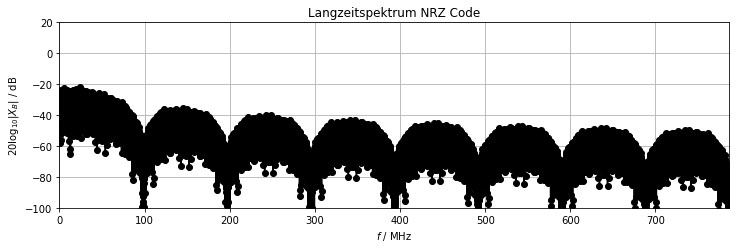

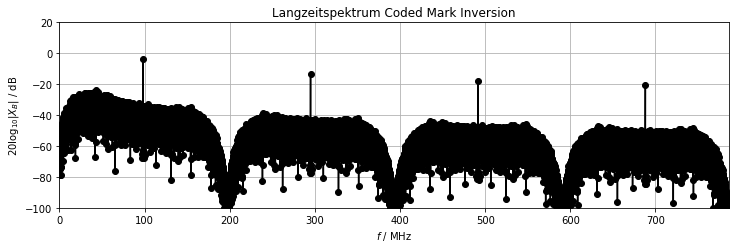

In [2]:
# Bitfolge / Takt -> Benutzer Eingabe:
if False:  # kurze Bitfolge, niedrige Frequenz zum Validieren des Codes
    b = np.array([1,0,1,0,1,0,1,0,1,1,0,0])  # definiere Bitfolge
    b = np.array([1,0,1,1,0,1,0,0])  # definiere Bitfolge wie im Beispiel oben    
    TB = 1/1  # Zeit für ein Bit
    Einheitsskalierung = 0  # 0 für s / Hz, 3 für ms / kHz, 6 für us / MHz
else:  # lange Bitfolge, hohe Frequenz zum Validieren und Studieren des Langzeitspektrums
    b = np.random.randint(2, size=2**12)
    TB = 1/(48000*32*64)  # Zeit für ein Bit, z.B. bei MADI 48 kHz Abtastfrequenz, 32 Bits pro Sample, 64 Kanäle
    Einheitsskalierung = 6  # 0 für s / Hz, 3 für ms / kHz, 6 für us / MHz
    #TB = 4/5*TB  # MADI 4B5B Redundanzcodierung, ca. 5/4 Bandbreitenerhöhung, aber vgl. viel robuster
# ---
print("2*TB=",2*TB*1000*1000*1000,"ns")
print("TB=",TB*1000*1000*1000,"ns")
print("1/(2*TB)=",1/(2*TB)/1000/1000,"MHz")
print("1/(1*TB)=",1/TB/1000/1000,"MHz")

fs = 1 / (1/100 * TB)  # Abtastfrequenz für quasikontinuierliche Bitfolge, daher Wahl Abtasttakt Ts << TB
N = int(TB * fs)  # Anzahl Samples für Darstellung eines einzelnen Bitzustandes
x = np.zeros(N*len(b))  # RAM Allokation für vollständiges Bitfolgensignal x
t = np.arange(0,len(x))/fs  # definiere Zeitachse für Bitfolgensignal x(t)
df = fs/len(x)  # Frequenzauflösung der DFT in Hz für die Spektrumsdarstellung
f = np.arange(0,fs,df)  # definiere Frequenzachse für Spektrum X(f) von x(t)

# Erzeugung NRZ Code
x = get_NRZ_Code(x,b,N)
X = np.fft.fft(x)
X = 2 / len(X) * np.abs(X)  # Betragsspektrum
plot_my_code(t,x,f,X,TB,'Langzeitspektrum NRZ Code',Einheitsskalierung)  # Plotten

# Erzeugung 'Coded Mark Inversion' Code
x = get_Coded_Mark_Inversion(x,b,N)
X = np.fft.fft(x)
X = 2 / len(X) * np.abs(X)  # Betragsspektrum
plot_my_code(t,x,f,X,TB,'Langzeitspektrum Coded Mark Inversion',Einheitsskalierung)  # Plotten

# Datenrate

## Beispiel: Multichannel Audio Digital Interface (MADI)

### Nutz-Datenrate MADI (64 Kanäle, fs=48 kHz über Coax, STP, Fiber)

![Nutz-Datenrate MADI Schema](img/MADIFrame.png)


In [3]:
B = 32  # Bit pro Sample
fs = 48000  # Abtastfrequenz
Ch = 64  # Anzahl Kanäle

D = B*fs*Ch  # Bits pro Sekunde
print(D/1000/1000,"Mbit/s")  #/1000->kbit/s, /1000/1000->Mbit/s
print(D/1024/1024,"Mibit/s")  #/1024->kiBit/s, /1024/1024->MiBit/s

98.304 Mbit/s
93.75 Mibit/s


### Nutz-Datenrate SD-SDI ?!



<img src="https://upload.wikimedia.org/wikipedia/commons/3/32/CCD.png">

In [4]:
# Y Cb Cr 4:2:2 Chroma subsampling
fps = 25
HOR = 720
VER = 576
Bit = 10

D = HOR * VER * 2 * Bit * fps  # Bits pro Sekunde
print(D/1000/1000,"Mbit/s")  #/1000->kbit/s, /1000/1000->Mbit/s
print(D/1024/1024,"Mibit/s")  #/1024->kiBit/s, /1024/1024->MiBit/s

207.36 Mbit/s
197.75390625 Mibit/s


### Codierung-Datenrate SD-SDI

In [5]:
# Y Cb Cr 4:2:2 Chroma subsampling
fps = 25
HOR = 864  # mehr Zeilen / Spalten als aktiv im Bild zu sehen
VER = 625
Bit = 10

D = HOR * VER * 2 * Bit * fps  # Bits pro Sekunde
print(D/1000/1000,"Mbit/s")  #/1000->kbit/s, /1000/1000->Mbit/s
print(D/1024/1024,"Mibit/s")  #/1024->kiBit/s, /1024/1024->MiBit/s

270.0 Mbit/s
257.4920654296875 Mibit/s


## Beispiel: High Definition Serial Digital Interface (HD-SDI)

### Nutz-Datenrate HD-SDI

In [6]:
# Y Cb Cr 4:2:2 Chroma subsampling
fps = 25
HOR = 1920
VER = 1080
Bit = 10

D = HOR * VER * 2 * Bit * fps  # Bits pro Sekunde
print(D/1000/1000,"Mbit/s")  #/1000->kbit/s, /1000/1000->Mbit/s
print(D/1024/1024,"Mibit/s")  #/1024->kiBit/s, /1024/1024->MiBit/s

1036.8 Mbit/s
988.76953125 Mibit/s


### Codierung-Datenrate HD-SDI

In [7]:
# Y Cb Cr 4:2:2 Chroma subsampling, NRZI-Code
fps = 25
HOR = 2640  # mehr Zeilen / Spalten als aktiv im Bild zu sehen
VER = 1125
Bit = 10

D = HOR * VER * 2 * Bit * fps  # Bits pro Sekunde
print(D/1000/1000/1000,"Gbit/s")  #/1000->kbit/s, /1000/1000->Mbit/s, /1000/1000/1000->Gbit/s
print(D/1024/1024/1024,"Gibit/s")  #/1024->kiBit/s, /1024/1024->MiBit/s, /1024/1024/1024->GiBit/s


1.485 Gbit/s
1.3830140233039856 Gibit/s


## IT Übertragungsdatenraten

* USB 3.0 -> 5 Gbit/s
* Thunderbolt -> 40 Gbit/s
* Ethernet -> 100-400 Gbits/s
* LTE -> 1 Gbit/s

# Probleme: Teilen von Ressourcen des Übertragungsmediums

* sehr oft sind Sie nicht alleine auf einem Übertragungskanal
* Ressourcen teilen siehe Frequenzmultiplex und Zeitmultiplex im Anhang
* es braucht Regeln zum Datenverkehr, also z.B. wer spricht wann und wieviel; was passiert, wenn mehrere sprechen wollen und dann auch tatsächlich tun
* daher **Standardisierung der Datenübertragung** zwingend erforderlich

# Open Systems Interconnection Model (OSI)

<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Osi-model-jb.svg">
https://upload.wikimedia.org/wikipedia/commons/4/47/Osi-model-jb.svg

![](img/OSI_HubBridgeRouter.png)

## OSI Layer 1, i.e. Point-to-Point

### Standards

* AES3 (AES/EBU)
* AES10 (aka Multichannel Audio Digital Interface (**<font color='red'>MADI</font>**), Soundcraft, Studer, DiGiCo)
* AES42 (digitale Mikrofone)

* AES50 (aka High-Resolution Multi-Channel Audio Interconnection (HRMAI), Music Group, i.e. Behringer, Klark, Midas SuperMac/HyperMac
* **<font color='red'>HD-SDI</font>**
* SANE (Optocore) 

* DMX-512-A

* Firewire
* Thunderbolt
* USB 2/3/C



### Proprietär

* A-Net (Aviom)
* AudioRail

## OSI Layer 2, i.e. Bridge-basiert mit MAC, aka AoE (Audio over Ethernet)

### Standards

* AES47 (Asynchronous transfer mode als Netzwerk, i.e. Telefon)

* **<font color='green'>IEEE AVB/TSN</font>** (AVB...Audio Video Bridging, TSN...Time Sensitive Networking)

[AVnu Alliance](https://avnu.org/) (Gründung: Cisco, Xilinx, Intel, Harman)

**<font color='red'>Milan Protokoll</font>** (MeyerSound, L'Aoustics, d&b, Biamp)




### Proprietär

* CobraNet (Cirrus)
* EtherSound (Digigram)
* Digital Snake (Roland) 
* **<font color='red'>SoundGrid</font>** (Waves Audio)
* **<font color='red'>RockNet</font>** (Riedel)
* dSNAKE (Allen & Heath)

### ReBranding

* RAVE (QSC Audio, CobraNet)
* NetCIRA (Fostex, EtherSound)

## OSI Layer 3, i.e. IP-basiert mit MAC und IP-Protokoll, aka AoIP (Audio over IP)

### Standards

* **<font color='red'>AES67</font>** [Media Networking Alliance (MNA)](https://medianetworkingalliance.com/)

Anbieter: [http://medianetworkingalliance.com/wp-content/uploads/2017/12/AES67-Products-by-Category-09-January-2018.xlsx](http://medianetworkingalliance.com/wp-content/uploads/2017/12/AES67-Products-by-Category-09-January-2018.xlsx)

### Proprietär

* **<font color='red'>Dante</font>** (Audinate)
* Ravenna (ALC NetworX)
* Livewire (Axia Audio)
* Q-LAN (QSC)
* JACK Audio Connection Kit

### ReBranding

* OMNEO (Bosch, Dante+Control Protokoll)
* Audio and Control over Ethernet (ACE by Allen & Heath, Dante?+Control Protokoll)


# Summary: Communications Jungle

![Übertragungs-Dschungel](img/cloud_unsorted.png)

# Summary: It's complicated but...

![AV-Übertragung geordnet nach OSI-Layern](img/cloud_sorted.png)

# Outlook
It is very likely

* Layer 2 Protocols (AVoe) will be the future for AV networks 
* LTE next generation will be the future for professional wireless technology

# Literaturempfehlungen

## Artikel

* AES White Paper (2009): "[Best Practices in Network Audio](http://www.aes.org/technical/documents/AESTD1003V1.pdf)" in Journal of the Audio Engineering Society, Vol. 57, Number 9, Pages 729-741. 

* https://en.wikipedia.org/wiki/Comparison_of_audio_network_protocols

* *Milan - ein Protokoll für professionelle AV-Anwendungen* in [Production Partner 09/2018, S.14-29](https://www.musik-media-shop.de/production-partner-9-2018-digitale-vernetzung-time-sensitive-networking-tipps-gegen-netzwerktod-milan-zukunft-von-avb-glasfaser-handling-format-perspektiven)

* *Titelverteidiger: Dante, AES67, Ravenna* in [Production Partner 09/2018, S.32-33](https://www.musik-media-shop.de/production-partner-9-2018-digitale-vernetzung-time-sensitive-networking-tipps-gegen-netzwerktod-milan-zukunft-von-avb-glasfaser-handling-format-perspektiven)

* Yamaha 2014: [Einführung in die Audiovernetzung](https://download.yamaha.com/files/tcm:39-322554)

* https://en.wikipedia.org/wiki/Audio_over_Ethernet

* Lawo: [IP Networking Guide for Video and Audio Applications](https://www.lawo.de/support/know-how/ip-networking-guide.html)

## Bücher
* Stefan Weinzierl, [Handbuch der Audiotechnik](https://www.springer.com/de/book/9783540343004), Springer, 2008
* Ulrich Schmidt, [Professionelle Videotechnik](https://www.springer.com/de/book/9783642389917), Springer, 2013
* Jens-Rainer Ohm, [Multimedia Signal Coding and Transmission](https://www.springer.com/de/book/9783662466902), Springer 2015
* Steve Church, Skip Pizzi, [Audio over IP](https://www.sciencedirect.com/book/9780240812441/audio-over-ip), Focal, 2010

## Zeitschriften (Produktionen, KnowHow)

* [Production Partner](https://www.production-partner.de/)
* [pma](https://www.pma-magazin.de/)
* [VPLT Magazin](https://www.vplt.org/vplt-magazin)
* [Event Partner](https://www.event-partner.de/)
* [Professional System](https://www.professional-system.de/)

# Anhang: Fourierreihe Synthese

## Fourier-Synthese Formel

Jedes periodische, zeitkontinuierliche Signal $x(t)$ kann erzeugt werden durch

$x(t) = \frac{a_0}{2} + \sum\limits_{k=1}^{\infty} [a_k \cos(k \omega_0 t) + b_k \sin(k \omega_0 t)]$

mit Grundschwingung der Frequenz $f_0$, Periodendauer $T_0 = \frac{1}{f_0}$ und Kreisfrequenz $\omega_0=2 \pi f_0$

## Fourier-Analyse Formeln

Jedes periodische, zeitkontinuierliche Signal $x(t)$ kann analysiert werden auf sein Grundschwingungs- und Oberschwingungsgehalt mit:

* für den Gleichanteil

$a_0 = \frac{2}{T_0} \int\limits_{t}^{t+T_0} x(t) \, \mathrm{d}t$

* für gerade/axialsymmetrische Signalanteile

$a_k = \frac{2}{T_0} \int\limits_{t}^{t+T_0} x(t) \cos(k \omega_0 t) \, \mathrm{d}t$

* für ungerade/punktsymmetrische Signalanteile

$b_k = \frac{2}{T_0} \int\limits_{t}^{t+T_0} x(t) \sin(k \omega_0 t) \, \mathrm{d}t$

* das Linienspektrum, also der Betrag über die Frequenz $f_k = k \cdot f_0$ ist gegeben durch

$A_k = \sqrt{a_k+b_k}$


## Beispiel: Rechtecktastfolge

siehe [Papula, Mathe Anwendungsbeispiele, Kap. V, Bsp. 13](http://doi.org/10.1007/978-3-8348-2129-4)

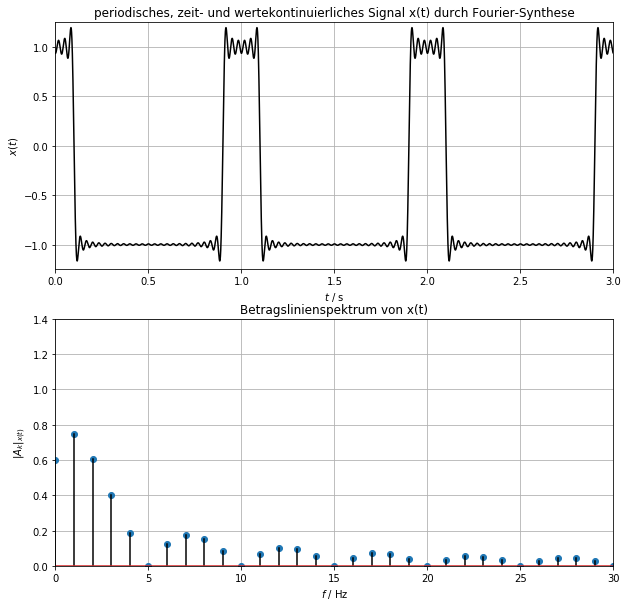

In [8]:
import matplotlib.pyplot as plt # Pakete zum Plotten
# Plots direkt hier erzeugen:
%matplotlib inline  
import numpy as np  # Pakete für Arrays und Vektoren

### Definition Signalcharakteristik ###

f0 = 1  # Grundfrequenz in Hz
T0 = 1 / f0  # Periodendauer in s
w0 = 2 * np.pi * f0  # Kreisfrequenz in rad/s

TB = T0 * 1/5  # Tastbreite in s, könnte dann z.B. eine 1 0 0 0, 1 0 0 0, 1 0 0 0...usw Bitfolgemuster sein  
A = 2  # Signalhub
NHarm = 30  # Anzahl der Harmonischen für Fourier-Synthese

### Vorbereitung Variablen ###

tmax = 3  # Zeitdauer in s
fs = 48000  # Abtastfrequenz in Hz, check ob 1/fs<<T0
t = np.linspace(0, tmax, tmax * fs)  # Zeitverlauf in s

x = t * 0  # Signal
ak = np.zeros(NHarm+1)  # Fourier Koeffizienten
f = np.zeros(NHarm+1)  # Frequenz in Hz

### Synthese axialsymmetrisches Rechteck-Signal (nur cos-Schwingungen) ###

# Gleichanteil:
ak[0] = A * TB/2 * w0/np.pi - A/2; # gleichanteilfrei
# fülle Vektoren für Gleichanteil
f[0] = 0
x = x + ak[0]
# Summiere über alle anderen Harmonischen:
for k in range(1,NHarm+1):
    f[k] = k * f0  # berechne aktuelle Frequenz
    ak[k] = A * 2/np.pi * np.sin(2 * np.pi * f[k] * TB/2) / k  # berechne aktuellen Fourierkoeffizienten
    x = x + ak[k]*np.cos(2 * np.pi * f[k] * t)  # überlagere cos-Schwingung mit aktueller Amplitude ak und Frequenz f

### grafische Darstellung ###
fig = plt.figure(figsize=(10,10))
plt.subplot(211)
plt.xlabel(r'$t$ / s')
plt.ylabel(r'$x(t)$')
plt.plot(t,x,'-k')  # Zeitverlauf
plt.grid()
plt.title('periodisches, zeit- und wertekontinuierliches Signal x(t) durch Fourier-Synthese')
plt.ylim(-A/2*1.25,+A/2*1.25)
plt.xlim(0, tmax)

plt.subplot(212)
plt.xlabel(r'$f$ / Hz')
plt.ylabel(r'$|A_k|_{x(t)}$')
plt.stem(f,np.abs(ak), '-k')  # Betragslinienspektrum, hier nur ak, daher sqrt(ak^2+bk^2) -> |ak| 
plt.grid()
plt.title('Betragslinienspektrum von x(t)')
plt.ylim(0, A/2*1.4)
plt.xlim(0, NHarm*f0)

plt.show()

# Anhang: Pegel dBFS RMS / PEAK

* Üblich: 0 dBFS entsprechen dem Pegel eines maximal vollausgesteuerten Signals. Es gibt keine Pegel größer 0 dBFS.

Sinnvoll ist es zu definieren:

* RMS-Pegel $20\log_{10}(\frac{x_\text{RMS}}{1})$ in $\text{dBFS}_\text{RMS}$
* Peak-Pegel $20\log_{10}(\frac{x_\text{Peak}}{1})$ in $\text{dBFS}_\text{Peak}$

Dann lässt sich der übliche dBFS-Pegel, welcher ursprünglich für Sinussignale definiert ist, linken zu

* $0 \text{dBFS}_\text{Peak} = 0 \text{dBFS}$

Für ein zeitdiskretes Sinussignal $x[n] = sin(\Omega n)$ gilt mit Amplitude $x_\text{Peak} = 1$ und Effektivwert $x_\text{RMS}=1/\sqrt{2}$ (und $\Omega\ll \pi$ nach Abtasttheorem) dann

* Sinus RMS-Pegel $20\log_{10}(\frac{1/\sqrt{2}}{1})$ = $-3 \text{dBFS}_\text{RMS}$
* Sinus Peak-Pegel $20\log_{10}(\frac{1}{1})$ = $0 \text{dBFS}_\text{Peak}$

Diese Konvention hat den Vorteil, dass Signalenergie und Signalamplitude getrennt spezifiziert werden können und daraus der sogenannte CrestFaktor zu Peak-Pegel - RMS-Pegel berechnet werden kann, für Sinus also 3 dB.

Beim Rechtecksignal ist wegen $x_\text{Peak} = x_\text{RMS}$ der CrestFaktor 0 dB, also Peak und RMS Pegel gleich groß.

Für typische Musik/Sprachsignale beträgt der CrestFaktor zwischen 20-40 dB und 4-6 dB, letzteres für sehr laut gemasterte Musik.

Die Konvention erlaubt auch RMS- und Peak-Werte größer zum (wilkürlich) gewählten Bezugswert 1, was dann zu positiven $\text{dBFS}_\text{RMS}$ und $\text{dBFS}_\text{Peak}$ führt. Dies kann bei interner Signaverrabeitung einer DAW bei Gleitkommazahlendarstellung nützlich sein, wo Samples durchaus Werte größer 1 annehmen können, solange sie vor der DA-Wandlung wieder abgesenkt werden unter 0.

# Anhang: Basisbandsignale vs. Bandpasssignale

Modulation von Basisband in anderes Frequenzband, gleichzeitige Nutzung mehrerer Frequenzbänder

![Frequenzmultiplex](img/FMulti.png)

### Beispiel: Bandpasssignale für Luftübertragung Digitale Dividende im HF-Funk

![Digitale Dividende](img/HF_Dividende.png)

Abb 6.3 aus [Frank Pieper: Das P.A. Handbuch, 5. Auflage, GCCarstensen, München, 2015](https://www.gccarstensen.de/buecher/das_p_a_handbuch)

<img src="https://upload.wikimedia.org/wikipedia/de/timeline/567a479f5cf164c141525f7c827d3f44.png" alt="Digitale Dividende 1">

<img src="https://upload.wikimedia.org/wikipedia/de/timeline/3d3021e962957575438308bb5e0c529c.png" alt="Digitale Dividende 2">

siehe https://de.wikipedia.org/wiki/Digitale_Dividende

# Anhang: Basisbandsignale zeitlich verschachtelt

Video Zeitmultiplex Composite Schematisch. 

Beachten Sie, dass in der Praxis Bilder Y Cb Cr anders übertragen werden.

![Zeitmultiplex](img/TMulti.png)
Foto aus https://en.wikipedia.org/wiki/YCbCr

# Anhang: Übertragungsmedien

* Bandbreite
* Kanalkapazität

## Eigenschaften 
 
### Luft


### Kupfer

Vermeidung von Reflexionen und Leistungsanpassung durch Abschlusswiderstand 75 / 110 / 120 Ohm

Ethernet CAT5/6 (Shielded Twisted Pair), Coax (Unsym+Ground), XLR (Sym+Ground)

### Glas

Single Mode, Multimode

## Beispiel: 3G/6G/12G Serial Digital Interface als reines Audio-Interface?!?!

In [9]:
B = 32  # Bit pro Sample
fs = 48000  # Abtastfrequenz
Ch = 64  # Anzahl Kanäle
D = 12 * 1000 * 1000 * 1000  # Bandbreite Bit / s

Ch = D/B/fs
print("für Nutzlast theoretisch Platz für", Ch, "Audiokanäle")

für Nutzlast theoretisch Platz für 7812.5 Audiokanäle


## Beispiel: Welches Medium?

In [10]:
print(16*2*44100 /1000/1000,"Mbit/s")

1.4112 Mbit/s


# Signal: Ton vs. Klang, Bild vs. Video

* Signal: Träger von Information durch zeitliche/räumliche Veränderung von Parametern einer physikalischen Größe, z.B. Amplitude und Frequenz

* Information für **Ton** vs. Information für **Klang**, **Musik*, **Sprache**, bzw. **Audio** allgemein

* Information für **Bild** vs. Information für **Video**

## Quellencodierung

* Irrelevanz komlett weg, die Emfpänger sowieso nicht auswerten kann
* Redundanz raus, die Empfänger wiederherstellen kann
* möglichst kompakt und für Senke ausreichend genau darstellen -> das weiss aber nur der Quellencodierer

Beispiele: 

* Transformationscodierung, Signal ist z.B. als Spektrum dargestellt viel effizienter zu codieren (mp3)
* Ausnutzen Psychophysik der Senke (mp3, RGB -> YCbCr)
* loss / losless Datenkompression

Frage: mp3 laut über PA?!?!

## Kanalcodierung

* Übertragung ist prinzipiell fehlerbehaftet (*Bits raten auf Grund von Wahrscheinlichkeiten*)
* Kanalcodierung fügt dem quellcodierten Signal spezielle Redundanz hinzu, die Fehlerkorrektur beim Empfänger ermöglichen, Stichwort: fehlerkorrigierende Codes
* Empfänger muss dazu über Kenntnis verfügen, wie die 'technische' Redundanz erzeugt wurde, um diese rückgängig zu machen und einhergehend auftretende Fehler zu korrigieren
* da annähernd alle Datenübertragungen außerhalb von Rechnern ohne extra Taktleitung verfügen, sollte der Kanalcodierer einen Bitstrom erzeugen, aus dem der Takt rückerzeugt werden kann, weil zeitliche Lage von Flanken und spezielle Bitmuster (Frames) erkennbar ist

## Leitungscodierung

* bestmögliche Anpassung an das gewählte Übertragungsmedium
* meist Gleichspannungsfreiheit gefordert
* kleinstmögliche Bandbreite bei möglichst tiefer Frequenz (weil Dämpfung bei niedrigen Frequenzen kleiner als bei hohen)
* Übertragung geschieht mit elektro-magnetischen Wellen, d.h. analog

# Netzwerk Topologien

![Netzwerk Topologien](img/NetzwerkTopologien.png)

<img src="https://upload.wikimedia.org/wikipedia/commons/9/97/NetworkTopologies.svg">

siehe https://de.wikipedia.org/wiki/Topologie_(Rechnernetz)#/media/File:NetzwerkTopologien.png

### Codierung-Datenrate MADI

* MADI benutzt Direkt Code, besser bekannt als Non-Return-to-Zero (NRZ)
* für Redundanzerhöhung und damit möglicher Fehlerkorrektur wird ein 4B/5B Code verwendet
* d.h. 4 Bits werden durch geschickte Wahl mit 5 Bits codiert, so dass bestimmte Bitmuster, die durch Störungen entstehen und im Codemuster gar nicht auftreten könnnen, detektiert und korrigiert werden können
* Takt ist uU nicht selbsttaktend, daher braucht MADI theoretisch Word Clock, z.B. einen 'leeren' AES3 (AES/EBU) Datenstrom
* in der Praxis funktioniert Selbstatktung ok

In [11]:
B = 32/4*5  # Bit pro Sample durch 4B5B Codierung, d.h. 4 Bit durch 5 Bit dargestellt
fs = 48000  # Abtastfrequenz
Ch = 64  # Anzahl Kanäle

D = B*fs*Ch  # Bits pro Sekunde
print(D/1000/1000,"Mbit/s")  #/1000->kbit/s, /1000/1000->Mbit/s
print(D/1024/1024,"Mibit/s")  #/1024->kiBit/s, /1024/1024->MiBit/s

122.88 Mbit/s
117.1875 Mibit/s


## Beispiel: Standard Definition Serial Digital Interface (SD-SDI)

* SD-SDI benutzt NRZI, d.h. ein Zwischending zwischen dem obigen Direkt Code (Non-Return-to-Zero (NRZ)) und Coded Mark Inversion, nämlich toggle 0 auf halbe Flanke und 1 auf High
* für Fehlerrobustheit und Selbsttaktung wird der Bitstrom verwürfelt, so dass er auf dem Kanal zufällig erscheint, kennt die Senke den Entschlüsselungscode, kann die ursprüngliche Bitfolge rekonstruiert werden